In [44]:
try:
    get_ipython().run_line_magic("load_ext", "lab_black")
    # %load_ext lab_black
    %config InlineBackendß.figure_format = 'retina'
except:
    print("Could not load lab_black")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import itertools

Could not load lab_black


# Dataset

In [45]:
# load metadata

path = '/kaggle/input/dataset/meta.csv'
df_coords = pd.read_csv(path)
df_coords["group"] = df_coords["cat"].str[0]
df_coords

,cat,x,y,group
0,P1,190,190,P
1,P2,190,890,P
2,I1,890,190,I
3,I2,590,770,I
4,I3,670,510,I


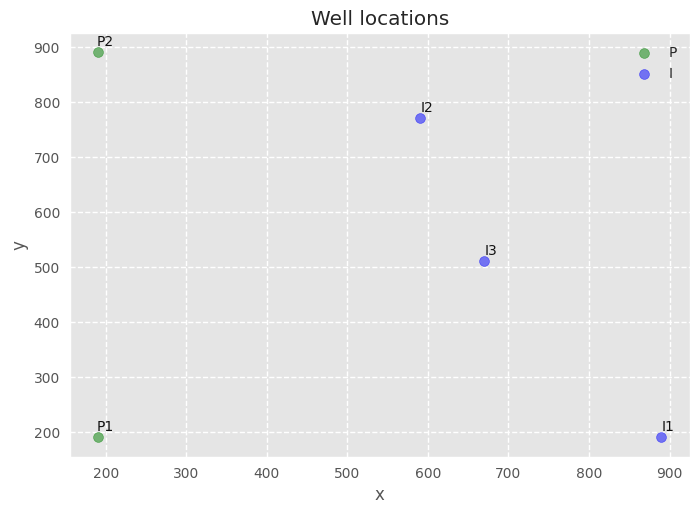

In [46]:
# create a dictionary that maps categories to colors
color_dict = {"P": "green", "I": "blue"}

# generate a scatter plot with color-coded points
for group, color in color_dict.items():
    df_cat = df_coords[df_coords["group"] == group]
    plt.scatter(df_cat["x"], df_cat["y"], s=50, alpha=0.5, color=color, label=group)

for i, row in df_coords.iterrows():
    plt.annotate(
        row["cat"],
        (row["x"], row["y"]),
        textcoords="offset points",
        xytext=(5, 5),
        ha="center",
        color="k",  # change the text color to red
    )

# add labels and legend
plt.title("Well locations")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(ls="--")
plt.legend()

In [47]:
# load data

path = "/kaggle/input/dataset/data.csv"
df = pd.read_csv(path)
print(df.sample(5).to_markdown())
df.head()

|       | cat   | group   |   date |           oil |       water |      liquid |         bhp |   status |   start_lag |   coef | is_base   |
|------:|:------|:--------|-------:|--------------:|------------:|------------:|------------:|---------:|------------:|-------:|:----------|
| 11481 | P2    | P       |     16 |  -0.000634664 | -0.00322816 | -0.00386283 | 2e+07       |        1 |          11 |   0.67 | False     |
| 13000 | P1    | P       |     20 |  -0.000710548 | -0.0019644  | -0.00267495 | 2e+07       |        1 |          14 |   0.67 | False     |
| 19205 | P1    | P       |      1 |  -0.00150164  |  0          | -0.00150164 | 2e+07       |        1 |           5 |   0.5  | False     |
|  4463 | I2    | I       |     22 | nan           |  0.001267   |  0.001267   | 3.16671e+07 |        1 |          16 |   0.17 | False     |
|  2116 | P2    | P       |      3 |  -0.00174027  |  0          | -0.00174027 | 2e+07       |        1 |          14 |   0.42 | False     |


,cat,group,date,oil,water,liquid,bhp,status,start_lag,coef,is_base
0,P1,P,0,-0.00,0.00,-0.00,20000000.00,1.00,19.00,0.42,False
1,P2,P,0,-0.00,0.00,-0.00,20000000.00,1.00,19.00,0.42,False
2,I1,I,0,NaN,0.00,0.00,40189871.30,1.00,19.00,0.42,False
3,I2,I,0,NaN,0.00,0.00,36654942.34,1.00,19.00,0.42,False
4,I3,I,0,NaN,NaN,NaN,NaN,0.00,19.00,0.42,False


In [48]:
# define the colormap to use
cmap = plt.get_cmap("Set2")

coefs = sorted(df["coef"].unique())

# convert the coefs list to a numpy array
coefs = np.array(coefs)

# use isnan() to create a boolean array indicating which values are NaN
mask = np.isnan(coefs)

# use the boolean array to select only the non-NaN values
coefs = coefs[~mask]

# generate a list of colors, one for each category
colors = cmap(np.linspace(0, 1, len(coefs)))

# create a dictionary that maps categories to colors
color_dict = dict(zip(coefs, colors))
color_dict

{0.08: array([0.4       , 0.76078431, 0.64705882, 1.        ]),
 0.17: array([0.98823529, 0.55294118, 0.38431373, 1.        ]),
 0.25: array([0.55294118, 0.62745098, 0.79607843, 1.        ]),
 0.33: array([0.90588235, 0.54117647, 0.76470588, 1.        ]),
 0.42: array([0.65098039, 0.84705882, 0.32941176, 1.        ]),
 0.5: array([1.        , 0.85098039, 0.18431373, 1.        ]),
 0.58: array([0.89803922, 0.76862745, 0.58039216, 1.        ]),
 0.67: array([0.70196078, 0.70196078, 0.70196078, 1.        ])}

Text(0.5, 0, 'timestamp')

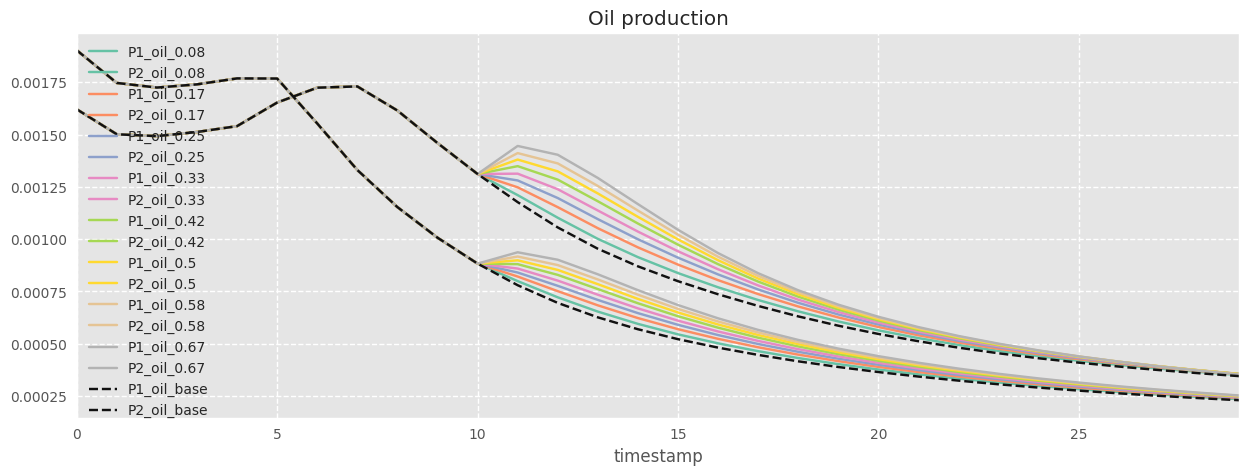

In [49]:
# create a new figure with a single set of axes
fig, ax = plt.subplots(figsize=(15, 5))

# iterate over all combinations of coef, start_lag, and segment
for coef, start_lag, segment in itertools.product(
    coefs,
    df["start_lag"].unique()[3:4],
    df["cat"].unique()[:2],
):
    data = df[
        (df["cat"] == segment) & (df["coef"] == coef) & (df["start_lag"] == start_lag)
    ]
    # select the color for the plot based on the category
    color = color_dict[coef]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["oil"]),
        label=f"{segment}_oil_{coef}",
        color=color,
    )

for segment in df["cat"].unique()[:2]:
    data = df[(df["cat"] == segment) & (df["is_base"] == True)]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["oil"]),
        label=f"{segment}_oil_base",
        color="k",
        ls="--",
    )

# set the x-axis limits, legend location, title, and grid
ax.set_xlim(df["date"].min(), df["date"].max())
ax.legend(loc="upper left")
ax.set_title("Oil production")
ax.grid(ls="--")
ax.set_xlabel("timestamp")

In [50]:
df["start_lag"].unique()[3:4]

array([10.])

When the `I3` well was activated during the 19th timestep, the oil production rates (`oil`) of `P1` & `P2` began to increase. This can be attributed to the injection of water by the `I3` well into the reservoir, which supports the reservoir pressure. As a result, the reservoir pressure increases and enhances the force that drives the fluid out of the reservoir.

Text(0.5, 0, 'timestamp')

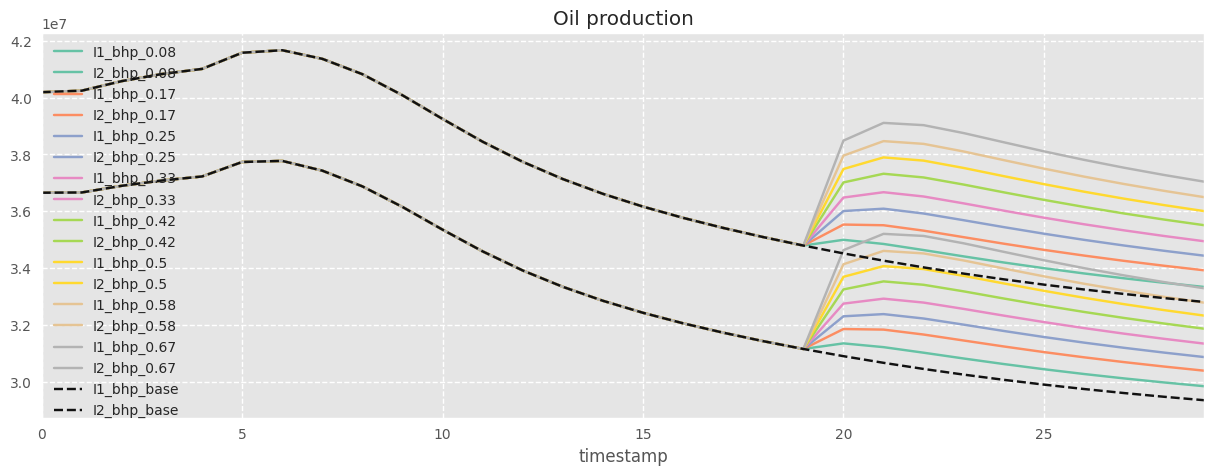

In [51]:
# create a new figure with a single set of axes
fig, ax = plt.subplots(figsize=(15, 5))

# iterate over all combinations of coef, start_lag, and segment
for coef, start_lag, segment in itertools.product(
    coefs,
    df["start_lag"].unique()[:1],
    df["cat"].unique()[2:4],
):
    data = df[
        (df["cat"] == segment) & (df["coef"] == coef) & (df["start_lag"] == start_lag)
    ]
    # select the color for the plot based on the category
    color = color_dict[coef]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        data["bhp"],
        label=f"{segment}_bhp_{coef}",
        color=color,
    )

for segment in df["cat"].unique()[2:4]:
    data = df[(df["cat"] == segment) & (df["is_base"] == True)]

    # plot the data for this combination of coef, start_lag, and segment
    ax.plot(
        data["date"],
        np.abs(data["bhp"]),
        label=f"{segment}_bhp_base",
        color="k",
        ls="--",
    )

# set the x-axis limits, legend location, title, and grid
ax.set_xlim(df["date"].min(), df["date"].max())
ax.legend(loc="upper left")
ax.set_title("Oil production")
ax.grid(ls="--")
ax.set_xlabel("timestamp")

Furthermore, the bottomhole pressure (`bhp`) of the wells `I1` & `I2` began to increase after `I3` activation during the 19th timestep. This can be attributed to the water injection by the `I3` well into the reservoir, which supports the reservoir pressure and helps maintain the `bhp`.

## Context

Reservoir simulation is a mathematical model used to predict the flow of fluids in a reservoir over time. It's used to predict the performance of the reservoir and optimize the extraction process. In the home task, you are provided with synthetic reservoir data containing multiple reservoir simulations with different activation times of injector well `I3`**.** 

A reservoir is a dynamic system, meaning that its properties change over time due to fluid flow, pressure changes, and external factors like well interventions. To accurately model a reservoir, it is essential to account for these dynamic changes.

Injection wells inject water into the reservoir to maintain pressure and enhance oil recovery. The connectivity between injection and production wells is vital for understanding the impact of injected water on oil production in nearby wells.

As a reservoir is a closed system influenced by wells, events in one well will have a delayed impact on nearby wells. For instance, increasing the injection rate in an injector well may result in increased reservoir pressure, potentially leading to higher oil production rates in nearby production wells. However, this relationship may not be straightforward, and analyzing the simulation data is crucial for better understanding this interaction. In data science terms, increasing water injection in the injection well will eventually reach the production well and alter the oil flowrate with a certain time lag.

Adding more production or injection wells to a reservoir can affect flow rates and pressure distribution within the reservoir, potentially altering the behavior of existing wells. This should be considered when modeling reservoir dynamics. For example, activating an injection well and injecting water into it will increase the pressure around that well. If the pressure front propagates to a production well, it can lead to increased oil flow rates for the producing well (unless there is a water breakthrough).

Now that you have a basic understanding of these concepts, you can proceed with the home task.

## Task

Your task is **to come up with the methodology to select features and evaluate time lags which should be used to build a robust predictive model for forecasting** the flow rates of wells `P1` and `P2` for a 3-step horizon using provided reservoir simulation data. You may choose to forecast oil or liquid flowrates.

In the context of the home task, understanding this dynamic connectivity between injection and production wells will be essential for building a robust predictive model for forecasting the flow rates of wells `P1` ****and `P2`. By analyzing the simulation data and considering factors such as distance between producers and injectors, and time of producing or injection, you can improve your model's ability to account for the impact of injection well activation on the flow rates of nearby production wells.

# Importing libraries

In [52]:

# DATA VISUALIZATION
# ------------------------------------------------------
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.gridspec import GridSpec

# CONFIGURATIONS
# ------------------------------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

import os
# install pycaret
os.system("pip3 install -q pycaret")

# import the regression module
from pycaret.regression import *

# Import necessary libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import datetime as dt
from itertools import combinations

# EDA and Feature Engineering

In [53]:
# quick glance at the dimensions of the dataset
df.shape

(28920, 11)

In [54]:
summary = df["group"].value_counts(normalize = True)
print(summary)

I   0.60
P   0.40
Name: group, dtype: float64


In [55]:
# Get the data types of all columns
dtypes = df.dtypes
dtypes

cat           object
group         object
date           int64
oil          float64
water        float64
liquid       float64
bhp          float64
status       float64
start_lag    float64
coef         float64
is_base         bool
dtype: object

In [56]:
df.describe()

,date,oil,water,liquid,bhp,status,start_lag,coef
count,28920.00,11640.00,26328.00,26328.00,26328.00,28920.00,28800.00,28800.00
mean,14.50,-0.00,0.00,0.00,29080808.67,0.91,12.50,0.38
std,8.66,0.00,0.00,0.00,8485229.48,0.29,6.92,0.19
min,0.00,-0.00,-0.00,-0.00,20000000.00,0.00,1.00,0.08
25%,7.00,-0.00,-0.00,-0.00,20000000.00,1.00,6.75,0.23
50%,14.50,-0.00,0.00,0.00,31590173.96,1.00,12.50,0.38
75%,22.00,-0.00,0.00,0.00,36663866.64,1.00,18.25,0.52
max,29.00,0.00,0.00,0.00,49500088.99,1.00,24.00,0.67


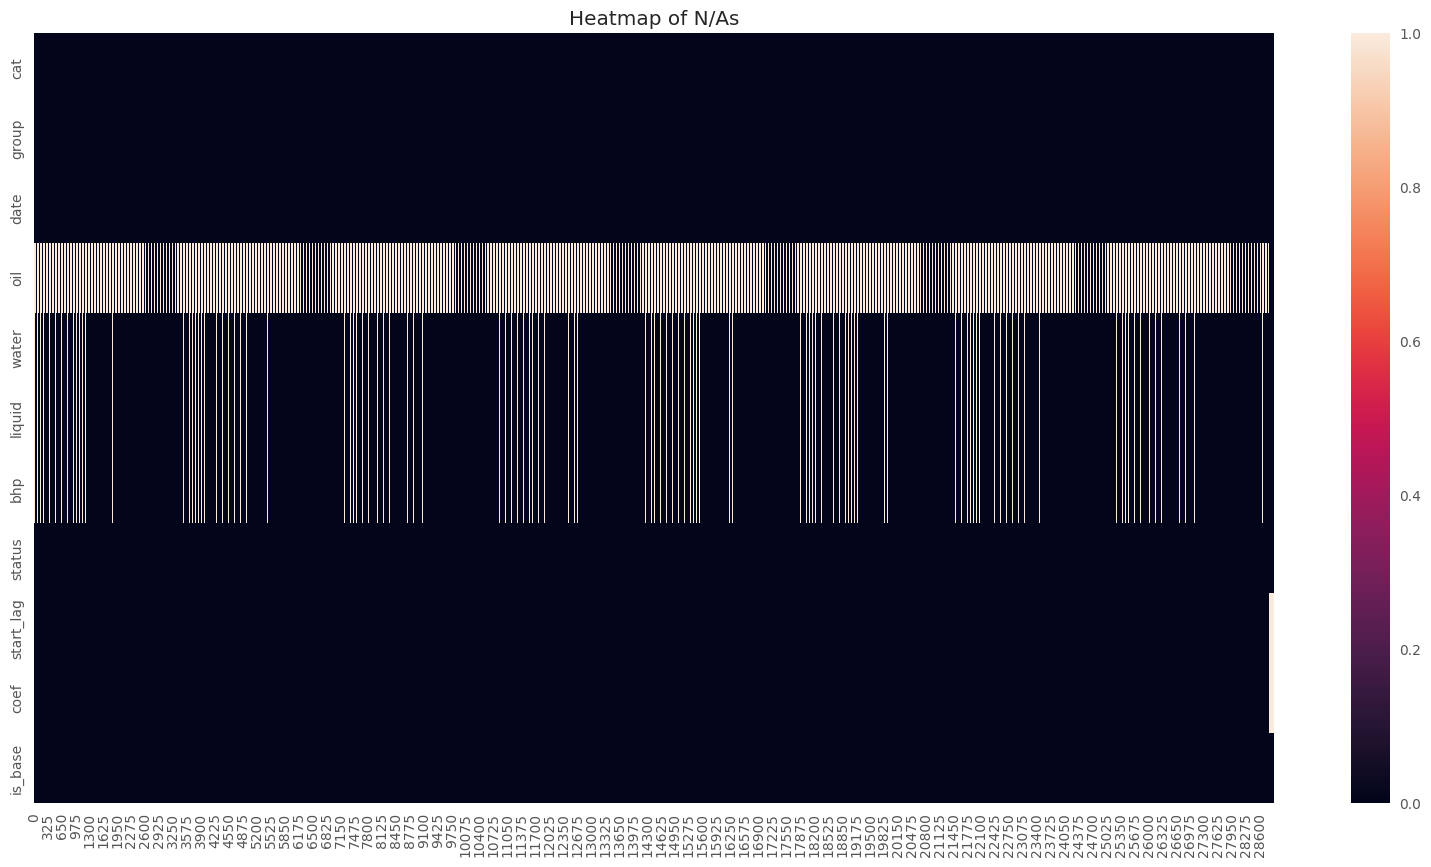

In [57]:
# generating heatmap of N/As
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
sns.heatmap(df.isna().T)
plt.title('Heatmap of N/As')
plt.show()

In [58]:
print("amount of rows with missing values in the dataset:")
print(df.isna().any(axis=1).sum())
print("amount of cols with missing values in the dataset:")
print(df.isna().any(axis=0).sum())

amount of rows with missing values in the dataset:
17400
amount of cols with missing values in the dataset:
6


In [59]:
for col in df.columns:
    try:
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals} unique values")
    except TypeError:
        print(f"Skipping column '{col}' with unhashable data type")

cat: 5 unique values
group: 2 unique values
date: 30 unique values
oil: 6397 unique values
water: 6253 unique values
liquid: 6406 unique values
bhp: 9565 unique values
status: 2 unique values
start_lag: 24 unique values
coef: 8 unique values
is_base: 2 unique values


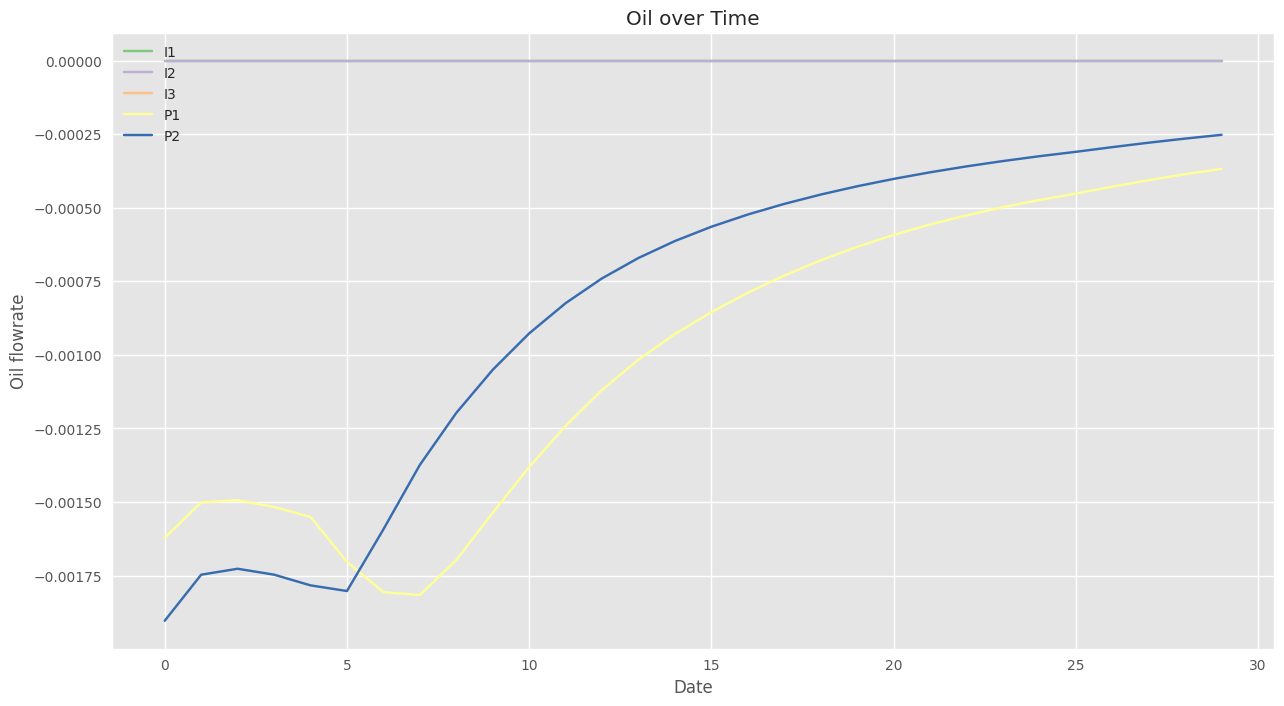

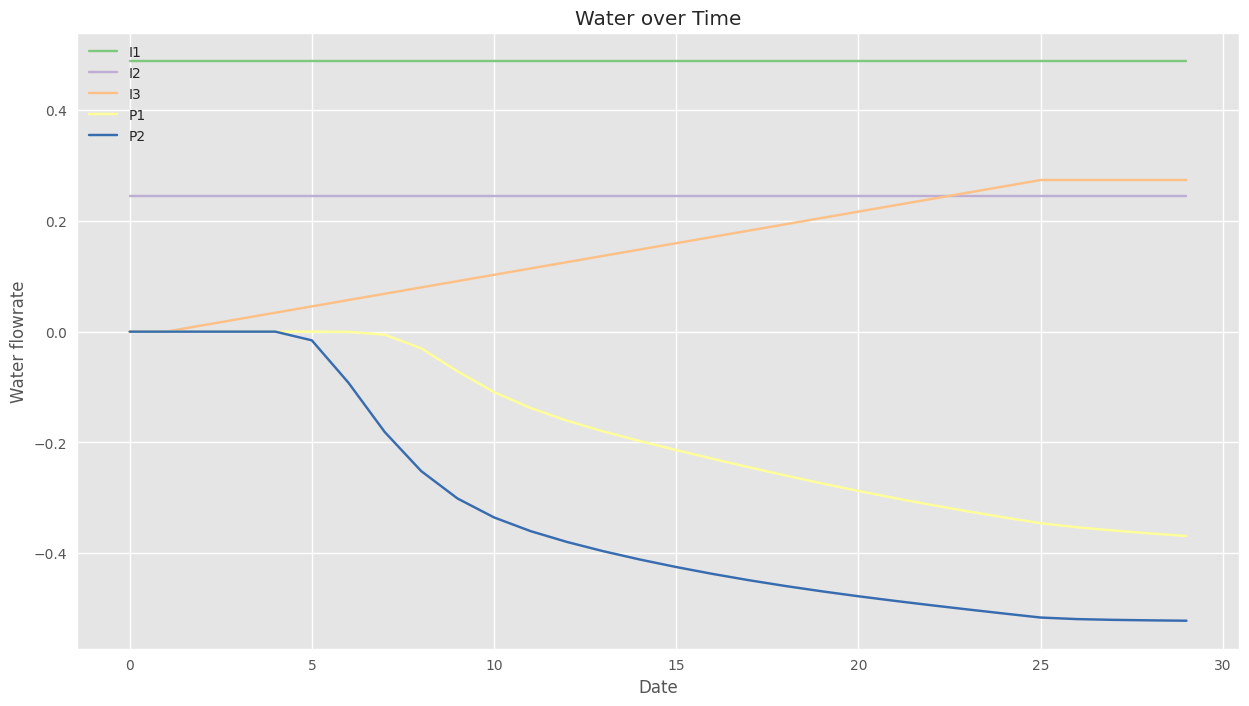

In [60]:
# Group the categories by date and cat 
grouped_cat_oil = pd.DataFrame(df.groupby(['date', 'cat'])['oil'].mean())

# Create a line plot of the sales for each family over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped_cat_oil, x='date', y='oil', hue='cat', palette='Accent')
plt.title('Oil over Time')
plt.xlabel('Date')
plt.ylabel('Oil flowrate')
plt.legend(loc='upper left')
plt.show()

# Group the categories by date and cat f
grouped_cat_water = pd.DataFrame(df.groupby(['date', 'cat'])['water'].sum())

# Create a line plot of the sales for each family over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped_cat_water, x='date', y='water', hue='cat', palette='Accent')
plt.title('Water over Time')
plt.xlabel('Date')
plt.ylabel('Water flowrate')
plt.legend(loc='upper left')
plt.show()

In [61]:

# Create a dictionary to map the coordinates based on category
coordinates = {
    row['cat']: (row['x'], row['y']) for _, row in df_coords.iterrows()
}

# Create a function to calculate the distance between two points
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Add distance features from each well to all other wells
def add_distance_features(data):
    wells = data['cat'].unique()
    distances = []
    for well1 in wells:
        for well2 in wells:
            coords1 = coordinates[well1]
            coords2 = coordinates[well2]
            distance = calculate_distance(coords1, coords2)
            distances.append((well1, well2, distance))

    distance_df = pd.DataFrame(distances, columns=['well1', 'well2', 'distance'])
    distance_pivot = distance_df.pivot(index='well1', columns='well2', values='distance')
    distance_pivot.columns = [f'distance_to_{well}' for well in distance_pivot.columns]
    
    data_with_distances = pd.merge(data, distance_pivot, left_on='cat', right_index=True, how='left')
    return data_with_distances

# Assuming you have a pandas DataFrame 'data' with columns 'cat'
# representing each well and you want to add distance features
data_with_distances = add_distance_features(df)

In [62]:
#Given status - This feature indicates whether the well is active or not. Even if there is a flow of liquid, if the value of status is 0, the well is not considered to be participating in the simulation.
data_with_distances.loc[data_with_distances['status']==0,'water']=0
data_with_distances.loc[data_with_distances['status']==0,'bhp']=0

In [63]:
# liquid variable can be dropped from the dataset, since it does not contain any information apart from what is already included in water and oil.
data_with_distances.drop(['liquid'] ,axis=1, inplace=True)

# replacing NAs with 0 for start_lag and coef to perform merging 
data_with_distances.loc[data_with_distances['start_lag'].isnull(), 'start_lag'] = 0
data_with_distances.loc[data_with_distances['coef'].isnull(), 'coef'] = 0

In [64]:
# Filter the DataFrame for the desired categories (P1 and P2)
df_filtered = data_with_distances[data_with_distances['cat'].isin(['P1', 'P2'])]

# Merge the DataFrame with I1, I2, and I3 based on the common columns 'date', 'start_lag', and 'coef'
df_filtered = df_filtered.merge(data_with_distances[data_with_distances['cat'].isin(['I1'])]
                                .rename(columns={'cat': 'cat_other',
                                                 'oil': 'I1_oil',
                                                 'water': 'I1_water',
                                                 'bhp': 'I1_bhp',
                                                 'status': 'I1_status',
                                                 'is_base' : 'I1_is_base',
                                                 'distance_to_I1': 'distance_to_I1_other',
                                                 'distance_to_P1': 'distance_to_P1_other',
                                                 'distance_to_I2': 'distance_to_I2_other',
                                                 'distance_to_I3': 'distance_to_I3_other',
                                                 'distance_to_P2': 'distance_to_P2_other'}),
                                on=['date', 'start_lag', 'coef'], how='left')
df_filtered = df_filtered.merge(data_with_distances[data_with_distances['cat'].isin(['I2'])]
                                .rename(columns={'cat': 'cat_other',
                                                 'oil': 'I2_oil',
                                                 'water': 'I2_water',
                                                 'bhp': 'I2_bhp',
                                                 'status': 'I2_status',
                                                 'is_base' : 'I2_is_base',
                                                 'distance_to_I1': 'distance_to_I1_other',
                                                 'distance_to_P1': 'distance_to_P1_other',
                                                 'distance_to_I2': 'distance_to_I2_other',
                                                 'distance_to_I3': 'distance_to_I3_other',
                                                 'distance_to_P2': 'distance_to_P2_other'}),
                                on=['date', 'start_lag', 'coef'], how='left')
df_filtered = df_filtered.merge(data_with_distances[data_with_distances['cat'].isin(['I3'])]
                                .rename(columns={'cat': 'cat_other',
                                                 'oil': 'I3_oil',
                                                 'water': 'I3_water',
                                                 'bhp': 'I3_bhp',
                                                 'status': 'I3_status',
                                                 'is_base' : 'I3_is_base',
                                                 'distance_to_I1': 'distance_to_I1_other',
                                                 'distance_to_P1': 'distance_to_P1_other',
                                                 'distance_to_I2': 'distance_to_I2_other',
                                                 'distance_to_I3': 'distance_to_I3_other',
                                                 'distance_to_P2': 'distance_to_P2_other'}),
                                on=['date', 'start_lag', 'coef'], how='left')

In [65]:
# Drop columns ending with 'x' or 'y'
columns_to_drop = [col for col in df_filtered.columns if col.endswith(('_x', '_y', 'other'))]
df_filtered = df_filtered.drop(columns=columns_to_drop)


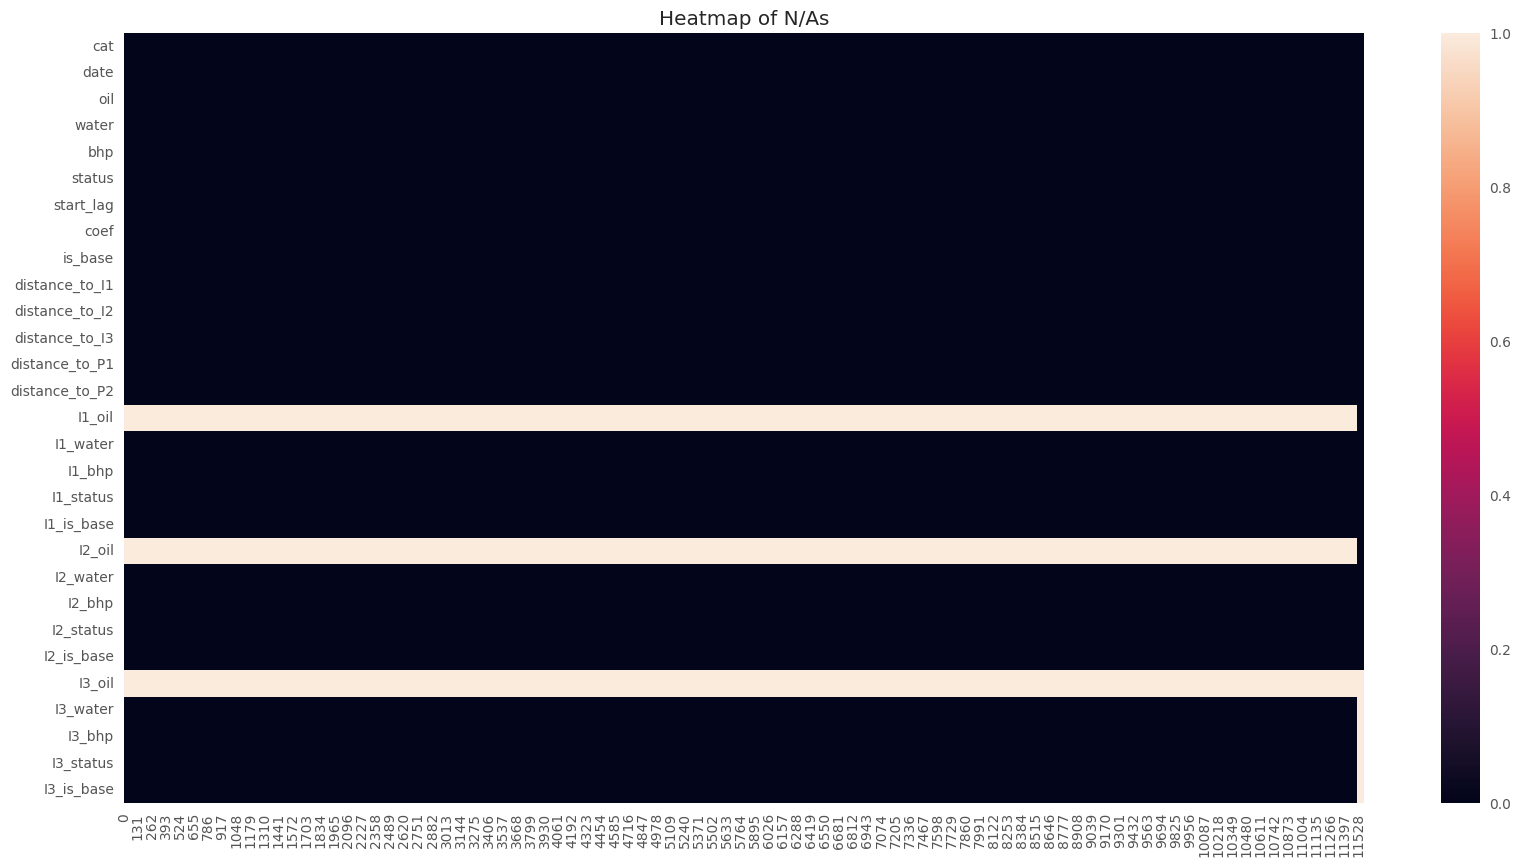

In [66]:
# generating heatmap of N/As
plt.figure(figsize=(20,10))
sns.heatmap(df_filtered.isna().T)
plt.title('Heatmap of N/As')
plt.show()

In [67]:
# since all values are Nulls and, as it is written on the description, an injector well cannot produce oil, we can drop the oil feature for I1 and I3.
df_filtered = df_filtered.drop(['I1_oil','I2_oil', 'I3_oil'], axis = 1)

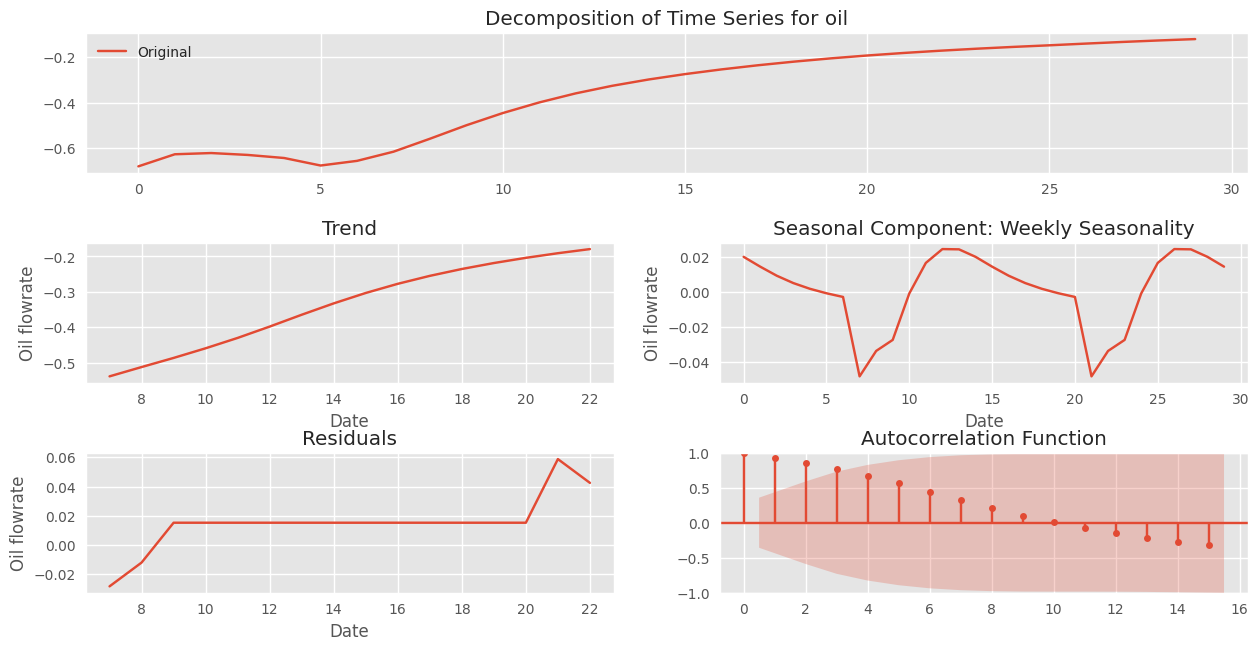

ADF Statistic: -1.652321
p-value: 0.455830


In [68]:
# Aggregate data by date
df_oil_agg = df_filtered.groupby(['date']).agg({'oil':'sum'})

# Decompose the time series
decomposition = seasonal_decompose(df_oil_agg, model='additive', period=14)  
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# create a grid of subplots using GridSpec
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(4, 2, figure=fig)

# plot the original time series
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(df_oil_agg)
ax1.set_title('Decomposition of Time Series for oil')
ax1.legend(['Original'], loc='best')

# plot the trend component
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(trend)
ax2.set_title('Trend')
ax2.set_xlabel('Date')
ax2.set_ylabel('Oil flowrate')

# plot the seasonal component
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(seasonal)
ax3.set_title('Seasonal Component: Weekly Seasonality')
ax3.set_xlabel('Date')
ax3.set_ylabel('Oil flowrate')

# plot the residual component
ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(residual)
ax4.set_title('Residuals')
ax4.set_xlabel('Date')
ax4.set_ylabel('Oil flowrate')

# plot the autocorrelation function
ax5 = fig.add_subplot(gs[2, 1])
plot_acf(df_oil_agg, ax=ax5)
ax5.set_title('Autocorrelation Function')


# add spacing between subplots
fig.subplots_adjust(hspace=0.5)

# show the plot
plt.show()

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(df_oil_agg['oil'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [69]:
# since a clear trend is transparent we will creat a feature to capture this
df_filtered['trend_slope'] = np.arange(len(df_filtered)) / len(df_filtered)

# We should use lag features with with caution because they can represent data leakage if available in validation set.
df_filtered['4days_lag'] = df_filtered.groupby(['cat', 'coef', 'start_lag'])['oil'].shift(4) #We will use 4 days lag because we are to predict for 3 days and thus nodata leakage is ensured.

# drop rows with no lag information
df_filtered.dropna(subset=['4days_lag'], inplace=True)

In [70]:
for col in df_filtered.columns:
    try:
        unique_vals = df_filtered[col].nunique()
        print(f"{col}: {unique_vals} unique values")
    except TypeError:
        print(f"Skipping column '{col}' with unhashable data type")

cat: 2 unique values
date: 26 unique values
oil: 6340 unique values
water: 6243 unique values
bhp: 1 unique values
status: 1 unique values
start_lag: 25 unique values
coef: 9 unique values
is_base: 2 unique values
distance_to_I1: 2 unique values
distance_to_I2: 2 unique values
distance_to_I3: 2 unique values
distance_to_P1: 2 unique values
distance_to_P2: 2 unique values
I1_water: 1 unique values
I1_bhp: 3170 unique values
I1_status: 1 unique values
I1_is_base: 2 unique values
I2_water: 1 unique values
I2_bhp: 3170 unique values
I2_status: 1 unique values
I2_is_base: 2 unique values
I3_water: 9 unique values
I3_bhp: 3145 unique values
I3_status: 2 unique values
I3_is_base: 1 unique values
trend_slope: 10036 unique values
4days_lag: 4852 unique values



Interestingly BHP and some other features are constants for P1 and P2. We can drop them from the df.

The features with two unique values will be one-hot-encoded.

In [71]:
# Calculate the number of unique values in each column
unique_counts = df_filtered.nunique()

# Get the column names with only one unique value
columns_to_drop = unique_counts[unique_counts == 1].index

# Drop the columns
df_filtered = df_filtered.drop(columns=columns_to_drop)

In [72]:
# Get the column names with only 2 unique values
columns_to_encode = df_filtered.columns[df_filtered.nunique() == 2]

# One-hot encode categorical columns using pandas get_dummies() function
df_encoded = pd.get_dummies(df_filtered, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)

In [73]:
df_encoded.oil = df_encoded.oil * 1000 # adjust the target to make the difference in evaluation metrics more clear
df_encoded.head()

,date,oil,water,start_lag,coef,I1_bhp,I2_bhp,I3_water,I3_bhp,trend_slope,4days_lag,cat_P2,is_base_True,distance_to_I1_989.9494936611666,distance_to_I2_704.5565981523415,distance_to_I3_612.2091146005587,distance_to_P1_700.0,distance_to_P2_700.0,I1_is_base_True,I2_is_base_True,I3_status_1.0
8,4,-1.54,0.00,19.00,0.42,41008433.46,37226562.69,0.00,0.00,0.00,-0.00,0,0,0,1,0,0,1,0,0,0
9,4,-1.77,0.00,19.00,0.42,41008433.46,37226562.69,0.00,0.00,0.00,-0.00,1,0,1,0,1,1,0,0,0,0
10,5,-1.65,0.00,19.00,0.42,41577600.24,37735735.87,0.00,0.00,0.00,-0.00,0,0,0,1,0,0,1,0,0,0
11,5,-1.77,-0.00,19.00,0.42,41577600.24,37735735.87,0.00,0.00,0.00,-0.00,1,0,1,0,1,1,0,0,0,0
12,6,-1.72,0.00,19.00,0.42,41665651.07,37773621.47,0.00,0.00,0.00,-0.00,0,0,0,1,0,0,1,0,0,0


# Modelling with PyCaret

In [74]:
df_encoded["date"] = pd.to_datetime(df_encoded.date)
# since in the task it is prescribed to forecast 3 time stamps ahead, we use 3 time stamps for validation
train = df_encoded.loc[df_encoded['date'] < '1970-01-01 00:00:00.000000027']
validation = df_encoded.loc[df_encoded['date'] >= '1970-01-01 00:00:00.000000027']

PyCaret setup can do the required preprocessing steps, i.e. normalization, feature selection, time series cross validation for us. 

In [82]:
# initialize setup
s = setup(data = df_encoded, date_features = ['date'],
                normalize = True, normalize_method='minmax',                
                test_data = validation, 
                target = 'oil',  
                ignore_features = [],     
                fold = 5, fold_strategy = 'timeseries',
                transform_target = True, index=False)
models = compare_models(sort='R2', turbo = True,verbose = True)

,Description,Value
0,Session id,5015
1,Target,oil
2,Target type,Regression
3,Original data shape,"(11194, 21)"
4,Transformed data shape,"(11194, 23)"
5,Transformed train set shape,"(10036, 23)"
6,Transformed test set shape,"(1158, 23)"
7,Numeric features,19
8,Date features,1
9,Rows with missing values,0.5%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0144,0.0008,0.0240,0.9967,0.0127,0.0249,2.7080
xgboost,Extreme Gradient Boosting,0.0168,0.0010,0.0295,0.9961,0.0151,0.0244,1.3740
et,Extra Trees Regressor,0.0151,0.0011,0.0262,0.9957,0.0142,0.0264,2.0420
lightgbm,Light Gradient Boosting Machine,0.0160,0.0012,0.0303,0.9953,0.0153,0.0240,0.8480
rf,Random Forest Regressor,0.0170,0.0015,0.0332,0.9941,0.0166,0.0258,3.1980
gbr,Gradient Boosting Regressor,0.0247,0.0017,0.0392,0.9934,0.0190,0.0335,1.5560
dt,Decision Tree Regressor,0.0213,0.0023,0.0433,0.9908,0.0220,0.0320,0.4080
knn,K Neighbors Regressor,0.0431,0.0048,0.0678,0.9805,0.0343,0.0631,0.3920
ada,AdaBoost Regressor,0.0716,0.0086,0.0917,0.9659,0.0436,0.0988,1.0340
ridge,Ridge Regression,0.0562,0.0170,0.1151,0.9333,0.0416,0.0635,0.4440


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Is is noticable that 7 models have an R-squared value of above 99%. Since CatBoost was the best on nearly all metrics we will go on with it.

In [83]:
# train the model
catboost = create_model('catboost')

# tune the model
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0117,0.0004,0.0209,0.9982,0.0097,0.0175
1,0.0346,0.0031,0.0560,0.9879,0.0310,0.0641
2,0.0114,0.0004,0.0195,0.9985,0.0101,0.0193
3,0.0068,0.0001,0.0113,0.9995,0.0058,0.0105
4,0.0077,0.0002,0.0123,0.9994,0.0069,0.0133
Mean,0.0144,0.0008,0.0240,0.9967,0.0127,0.0249
Std,0.0103,0.0012,0.0165,0.0044,0.0093,0.0198


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0208,0.0010,0.0311,0.9960,0.0163,0.0324
1,0.0308,0.0023,0.0481,0.9911,0.0250,0.0494
2,0.0194,0.0009,0.0308,0.9962,0.0154,0.0298
3,0.0154,0.0006,0.0251,0.9975,0.0122,0.0211
4,0.0150,0.0005,0.0226,0.9979,0.0116,0.0225
Mean,0.0203,0.0011,0.0315,0.9957,0.0161,0.0311
Std,0.0057,0.0006,0.0089,0.0024,0.0048,0.0101


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Catboost seems to be more robust after tuning. Therefore we will choose it as the final model.

In [84]:
# extract the parameters of the model
params_tuned_catboost = tuned_catboost.get_params()

print(params_tuned_catboost)

{'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 5015}


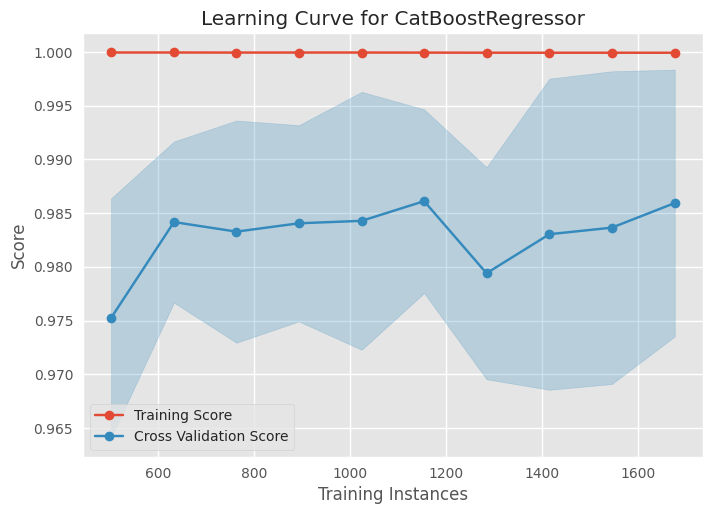

In [85]:
plot_model(estimator = tuned_catboost, plot = 'learning')

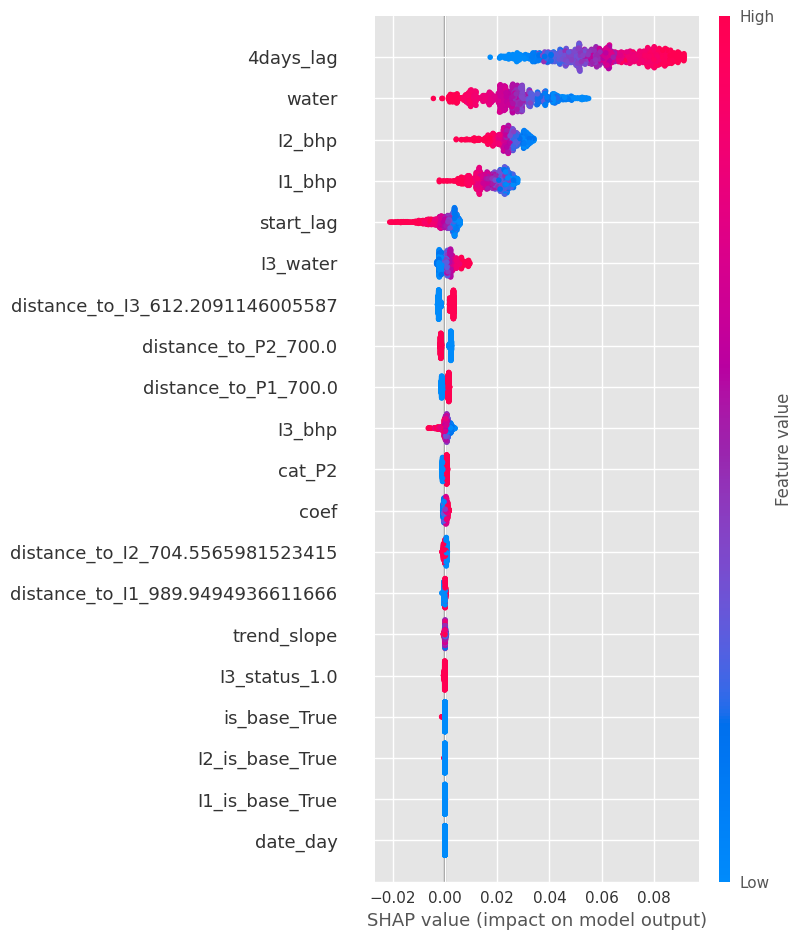

In [86]:
interpret_model(tuned_catboost)

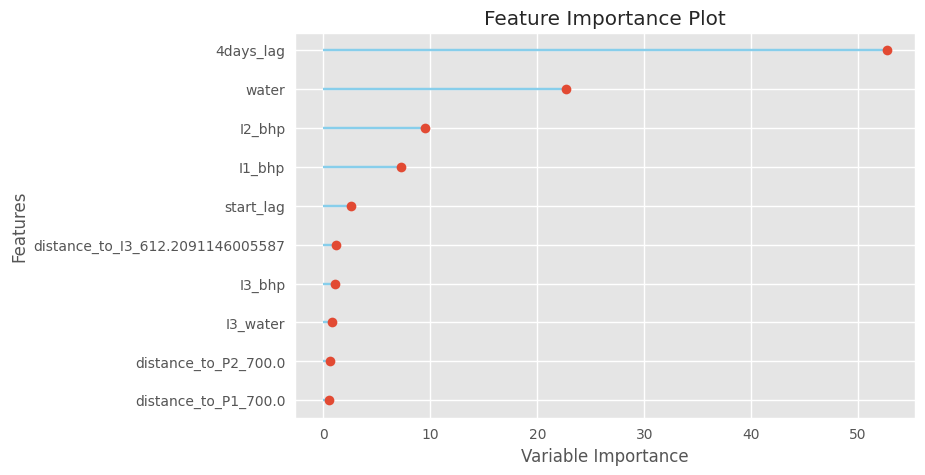

In [87]:
plot_model(estimator = tuned_catboost, plot = 'feature')

# Conclusion

The main predictors are:
- 4 days lag
- water
- I1_bhp
- I2_bhp

Start_lag, I3_bhp and I3_water as well as distance features also have some influence on the outcome but not that much.

Other variables seem to be not that important for the modelling and may be dropped from the final model. 

Most of the important variables were generated during Feature Engineering or deducted from transformation of the dataset.

Possible next steps for further improvement of the model:
- trying out other feature selection techniques, normalization techniques, multicollinearity removal
- more robust hyperparameter tuning.
- engineering additional features or extract them from other data sources (condition of the wells, weather conditions, any other external factors). 

If the required predictive period was different from 3 time stamps the model and important features might be different.